# 🚢 Surviving the Titanic

## Predicting who survives the Titanic shipwreck

<div align="center">
    <img src="https://www.en-vols.com/wp-content/uploads/afmm/2022/12/titanic2.jpg" alt="Titanic Movie" style="width: 600px;" align="center"/>
<div>
<div align="center">
  © Titanic (1997 film)
</div>

Can you really call yourself a Kaggler if you've never attempted the **legendary** Titanic dataset?

This notebook will bring you up to speed on data visualization, pipelines and **nested cross validation**. In particular, we'll focus on creating **custom transformers** and compiling them into complex pipelines.

Let's dive in...

---

### <font color='000000'>Table of contents<font><a class='anchor' id='top'></a>

1. [Introduction](#section-one)  
    
2. [Get Data](#section-two)
    
3. [Discover & Visualize Data](#section-three)
    
4. [Prepare Data](#section-four)  
 4.1 [Datatype Changer](#section-four-one)  
 4.2 [Column Deleter](#section-four-two)  
 4.3 [Column Combiner](#section-four-three)  
 4.4 [Title Extractor](#section-four-four)  
 4.5 [Age Imputer](#section-four-five)  
 4.6 [Pipeline](#section-four-six)  
    
5. [Select & Train Model](#section-five)
    
6. [Test Model](#section-six) 
    
7. [Conclusion](#section-seven)

---

<a class="anchor" id="section-one"></a>
## 1. Introduction

This notebook begins by **exploring** the datasets, as well as the relationships between the likelihood of survival and a passenger's age, class, etc.

Next, we'll **preprocess** the data by creating various custom transformers and assembling them together via a pipeline.

We'll proceed by **training** and comparing five different classifier models and their hyperparameters. Finally, we'll select the best model and use it to **predict** whether a passenger survives.


---

<a class="anchor" id="section-two"></a>
## 2. Get Data

* Take a quick look at the dataset.
* Observe the statistical data, as well as the number of missing values.

In [1]:
# Import libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Read the CSV file

file1 = 'train.csv'
file2 = 'test.csv'

train_data = pd.read_csv(file1)
test_data = pd.read_csv(file2)

In [3]:
# Grab the first 10 rows in dataset

train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Look at dtypes and number of NaN values in the training set

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Look at dtypes and number of NaN values in the test set

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# Get a statistical summary of numerical columns

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Set the X and y variables

X_train = train_data[train_data.columns[~train_data.columns.isin(['Survived'])]].copy()

y_train = train_data['Survived'].copy()

### Observations:

* Missing values (training set): Age, Cabin, Embarked
* Missing values (test set): Age, Fare, Cabin
* Percentage of passengers who survived: 38.38%
* Passenger class: majority are either second or third class
* Passenger age: average is <30yrs, oldest is 80yrs and youngest is <1yr
* Passenger's family: 52.30% with sibling/spouse and 38.16% with parents/children

---

<a class="anchor" id="section-three"></a>
## 3. Discover & Visualize Data

* Plot the distribution of each feature according to the likelihood of survival.
* Observe the correlation between features.

In [8]:
# Create a copy of the dataframe

train_data_copy = train_data.copy()

In [9]:
# Take a quick look at the Survived column

train_data_copy['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
# Take a quick look at the Pclass column

train_data_copy['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

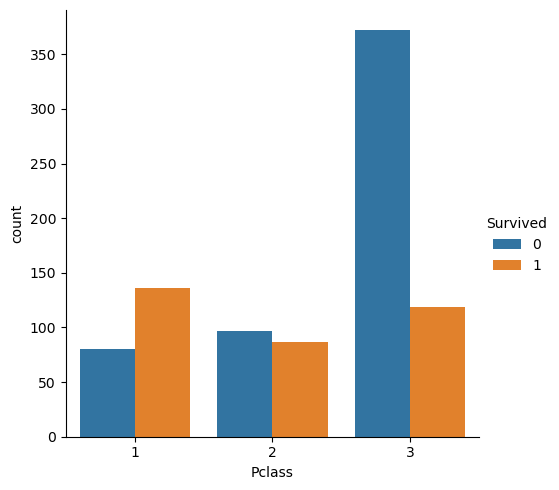

In [11]:
# Plot the likelihood of survival according to passenger class

sns.catplot(x = 'Pclass', hue = 'Survived', kind = 'count', data = train_data_copy)

In [12]:
# Take a quick look at the Sex column

train_data_copy['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

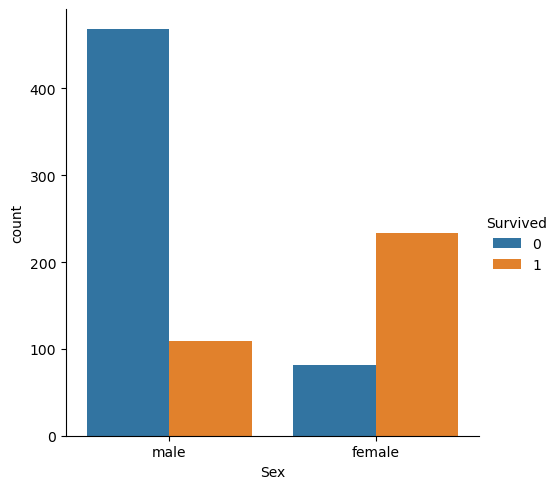

In [13]:
# Plot the suvival rate according to sex

sns.catplot(x = 'Sex', hue = 'Survived', kind = 'count', data = train_data_copy)

In [14]:
# Take a quick look at the Age column

train_data_copy['Age'].value_counts().sort_index()

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 88, dtype: int64

In [15]:
# Group Age column into age group

def group_by_age(train_data_copy):
    age_g = train_data_copy['Age']
    if age_g > 0.00 and age_g <= 10.00:
        return '0-10'
    if age_g > 10.00 and age_g <= 20.00:
        return '10-20'
    if age_g > 20.00 and age_g <= 30.00:
        return '20-30'
    if age_g > 30.00 and age_g <= 40.00:
        return '30-40'
    if age_g > 40.00 and age_g <= 50.00:
        return '40-50'
    if age_g > 50.00 and age_g <= 60.00:
        return '50-60'
    if age_g > 60.00 and age_g <= 70.00:
        return '60-70'
    if age_g > 70.00 and age_g <= 80.00:
        return '70-80'

train_data_copy['Age'] = train_data_copy.apply(group_by_age, axis = 1)

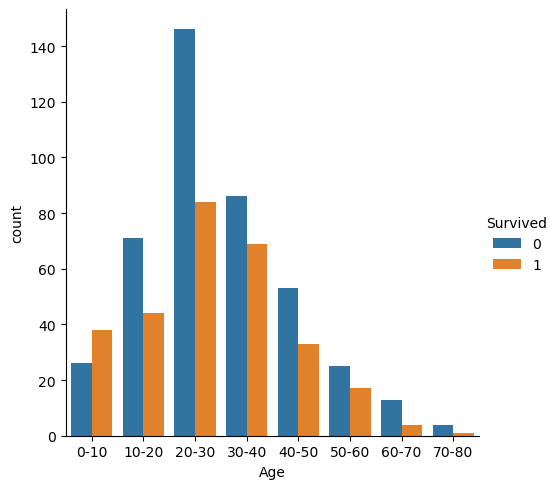

In [16]:
# Plot the suvival rate according to age group

sns.catplot(x = 'Age', hue = 'Survived', kind = 'count', data = train_data_copy.sort_values(by = 'Age'))

In [17]:
# Take a quick look at SibSp variable

train_data_copy['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

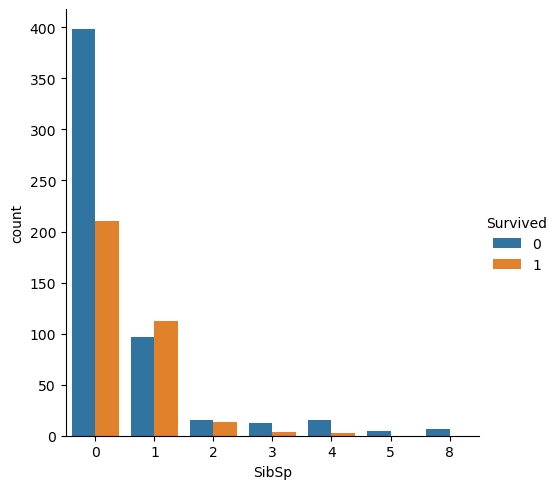

In [18]:
# Plot the suvival rate according to number of siblings/spouses onboard

sns.catplot(x = 'SibSp', hue = 'Survived', kind = 'count', data = train_data_copy)

In [19]:
# Take a quick look at the Parch column

train_data_copy['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

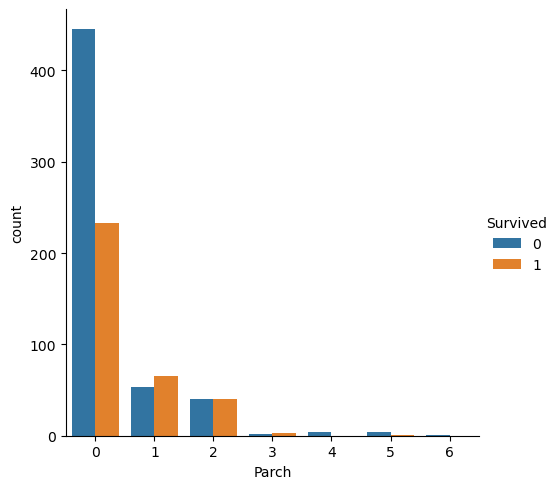

In [20]:
# Plot the suvival rate according to number of parents/children onboard

sns.catplot(x = 'Parch', hue = 'Survived', kind = 'count', data = train_data_copy)

In [21]:
# Take a quick look at the Fare column

train_data_copy['Fare'].value_counts().sort_index()

0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 248, dtype: int64

In [22]:
# Group Fare column into fare group

def group_by_fare(train_data_copy):
    fare_g = train_data_copy['Fare']
    if fare_g > 0.00 and fare_g <= 50.00:
        return '0-50'
    if fare_g > 50.00 and fare_g <= 100.00:
        return '50-100'
    if fare_g > 100.00 and fare_g <= 150.00:
        return '100-150'
    if fare_g > 150.00 and fare_g <= 200.00:
        return '150-200'
    if fare_g > 200.00 and fare_g <= 250.00:
        return '200-250'

train_data_copy['Fare'] = train_data_copy.apply(group_by_fare, axis = 1)

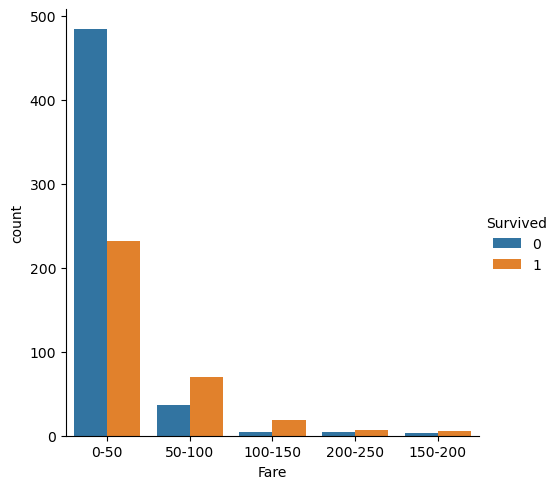

In [23]:
# Plot the suvival rate according to fare paid

sns.catplot(x = 'Fare', hue = 'Survived', kind = 'count', data = train_data_copy)

In [24]:
# Take a quick look at the Embarked column

train_data_copy['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

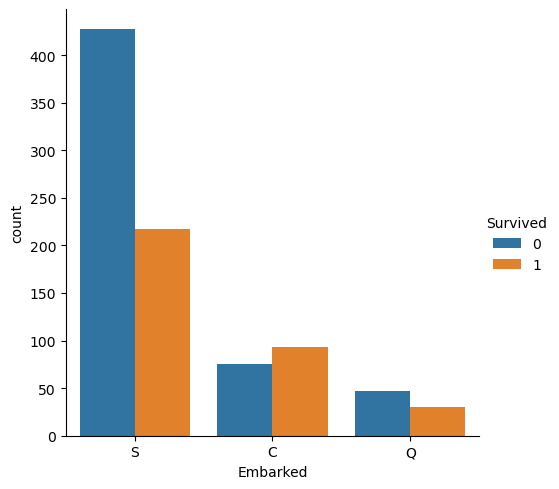

In [25]:
# Plot the suvival rate according to port of embarkation

sns.catplot(x = 'Embarked', hue = 'Survived', kind = 'count', data = train_data_copy)

/var/folders/01/ybv2rty51556cvf3x2h0ry100000gn/T/ipykernel_41566/351864932.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data_copy.corr())


<AxesSubplot: >

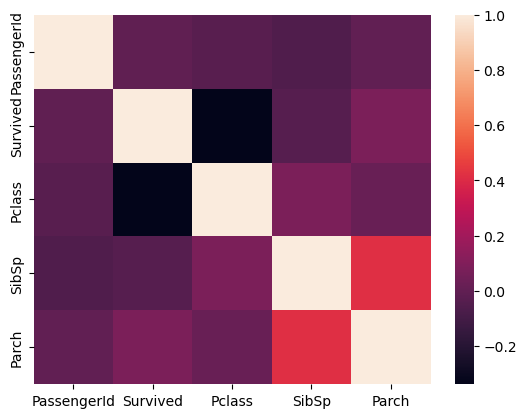

In [26]:
# Look at correlation

sns.heatmap(train_data_copy.corr())

### Observations: 

* Passengers who paid higher fares and were in the upper class were more likely to survive.
* Females have a higher likelihood of survival compared to males.
* Passengers within the age of 20-30 and 30-40 are more likely to survive.
* Passengers who travelled alone has a lower likelihood of survival.
* There is a small negative correlation between Pclass and Survived, while there is a small positive correlation between Parch and Survived.

---

<a class="anchor" id="section-four"></a>
## 4. Prepare Data

* Create five different custom transformers to handle preprocessing, attribute combinations anf feature engineering.
* Build a complex pipeline that 1) integrates our custom transformers and 2) combines two separate pipelines for both numerical and categorical variables.

### Understanding Custom Transformers:

You may be wondering: what **exactly** is a custom transformer? 

Basically, it's an object where we can apply custom transformations on input data. Even though Scikit-Learn has a ton of transformers we can use (like StandardScaler, etc.), sometimes we just need something a lil different.

Custom transformers can also integrate seamlessly with pipelines (more on that later), allowing us to **automate** data preparation. This gives us more time to play around with new features and different combinations.

To get started, we need to define a class with two methods: **fit** and **transform**. The fit method simply needs to return self, whereas the transform method is where our custom transformations take place. To avoid augmenting the original dataset, we'll create a copy before making changes and returning the dataset.

<a class="anchor" id="section-four-one"></a>
### 4.1: Datatype Changer

In [27]:
# Create a custom transformer to changer datatype

class DatatypeChanger():

    def __init__(self, columns):
        self.columns = columns
       
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns].astype(object)
        
        return X_copy

<a class="anchor" id="section-four-two"></a>
### 4.2: Column Deleter 

In [28]:
# Create a custom transformer to delete any column we want

class ColumnDeleter():

    def __init__(self, columns):
        self.columns = columns
       
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X_copy = X.copy()
        X_copy = X_copy.drop(self.columns, axis = 1)
        
        return X_copy

<a class="anchor" id="section-four-three"></a>
### 4.3: Column Combiner 

In [29]:
# Create a custom transformer to combine any column we want

class ColumnCombiner():
    
    def __init__(self):
        return None
       
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X_copy = X.copy()
        X_copy['FamilySize'] = X_copy['SibSp'] + X_copy['Parch'] + 1.00
        
        return X_copy

<a class="anchor" id="section-four-four"></a>
### 4.4: Title Extractor

In [30]:
# Create a custom transformer to extract the titles from the name column 

class TitleExtractor():
    
    def __init__(self):
        return None
       
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X_copy = X.copy()
        replacers = {'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Jonkheer': 'Noble', 'Don': 'Noble', 'Dona': 'Noble', \
                     'Sir': 'Noble', 'Countess': 'Noble', 'Lady': 'Noble', 'Rev': 'Clergy/Doctor', 'Dr': 'Clergy/Doctor', \
                     'Major': 'Military', 'Col': 'Military', 'Capt': 'Military'}
        
        X_copy['Title'] = X_copy['Name'].str.extract(' ([\w]+)\.')
        X_copy['Title'] = X_copy['Title'].replace(replacers)
        
        return X_copy

<a class="anchor" id="section-four-five"></a>
### 4.5: Age Imputer

In [31]:
# Create a custom transformer to impute the missing values in age

class AgeImputer():
    
    def __init__(self):
        self.title_med_list = []
        self.title_med_dict = {}
       
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X_copy = X.copy()
        title_uniq = X_copy['Title'].unique()
        
        for idx in X_copy['Title'].unique():
            title_med = X_copy[X_copy['Title'] == idx]['Age'].median()
            self.title_med_list.append(title_med)
            
        self.title_med_dict = dict(zip(title_uniq, self.title_med_list))
        
        for idx, val in X_copy['Age'].items():
            if pd.isnull(val):
                X_copy.loc[idx, 'Age'] = self.title_med_dict.get(X_copy.loc[idx, 'Title']) 
        
        return X_copy

<a class="anchor" id="section-four-six"></a>
### 4.6: Pipeline

### Understanding Pipelines:

Pipelines essentially chain together a series of transformers (or estimators).

By ensuring that the same transformations are applied to both the training and test set, this helps to **prevent data leakage**. Furthermore, the code becomes more **readable** and **replicable**.

The first step is to apply the five custom transformers we created above. 

Step two combines two separate pipelines, using ColumnTransformer, for numerical and categorical variables. The numerical pipeline will apply SimpleImputer and StandardScaler, while the categorical pipeline will apply SimpleImputer and OneHotEncoder. The columns are selected based on their datatypes (float and integer for numerical and object for categorical).

In [32]:
# Import libraries

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

In [33]:
# Build pipeline

preprocess_pipeline = Pipeline([
                                # Step 1: Apply custom transformers
                                ('datatype changer', DatatypeChanger(columns = ['Pclass'])),
                                ('columncombiner', ColumnCombiner()),
                                ('title extractor', TitleExtractor()),
                                ('age imputer', AgeImputer()),
                                ('column deleter', ColumnDeleter(columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])),
                                
                                # Step 2: Integreate Sklearn transformers
                                ('cleaner', ColumnTransformer([
                                    ('num', make_pipeline(
                                                          SimpleImputer(strategy = "median"),
                                                          StandardScaler()), 
                                                                make_column_selector(dtype_include = ['float64', 'int64'])),
                                    ('cat', make_pipeline(
                                                          SimpleImputer(strategy = 'most_frequent'),
                                                          OneHotEncoder()), 
                                                                make_column_selector(dtype_include = 'object'))]))
])

In [34]:
# Apply fit to X_train

preprocess_pipeline.fit(X_train)

Pipeline(steps=[('datatype changer',
                 <__main__.DatatypeChanger object at 0x141108a60>),
                ('columncombiner',
                 <__main__.ColumnCombiner object at 0x141108400>),
                ('title extractor',
                 <__main__.TitleExtractor object at 0x1411083d0>),
                ('age imputer', <__main__.AgeImputer object at 0x1411083a0>),
                ('column deleter',
                 <__main__.ColumnDeleter object at 0x141108340>),
                ('cleaner',
                 ColumnTrans...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1411084f0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1432dbc40>)]))])

In [35]:
# Apply transform to X_train

X_train = preprocess_pipeline.transform(X_train)

X_train

array([[-0.55741976, -0.50244517,  0.05915988, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.64941006,  0.78684529,  0.05915988, ...,  0.        ,
         1.        ,  0.        ],
       [-0.25571231, -0.48885426, -0.56097483, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.63284663, -0.17626324,  1.29942929, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25571231, -0.04438104, -0.56097483, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.19684888, -0.49237783, -0.56097483, ...,  1.        ,
         0.        ,  0.        ]])

---

<a class="anchor" id="section-five"></a>
## 5. Select & Train Model

* Create five different models: Logistic Regression, K-Nearest Neighbours, Decision Tree, Random Forest and Support Vector Machine.
* Perform nested cross validation with two loops: 1) inner loop where the estimators' hyperparameters are tuned and 2) outer loop where the estimators' errors are estimated.

### Understanding Nested Cross Validation:

When the same cross validation is used to evaluate and select a model, this leads to **optimistic bias**. 

Nested cross validation helps to overcome this bias by introducing an inner loop where hyperparameter tuning takes place.

In the **inner loop**, we use GridSearchCV to find the most optimal parameters from a given set of parameters (also known as a grid). Using each set of parameters, we test the accuracy using the validation set.

In the **outer loop**, we select the model with the best combination of parameters and evaluate its accuracy score.

In [36]:
# Import libraries

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [37]:
# Initialize models

lr = LogisticRegression(max_iter = 300, random_state = 3)
kn = KNeighborsClassifier(algorithm = 'auto')
dt = DecisionTreeClassifier( random_state = 3)
rf = RandomForestClassifier(random_state = 3)
sv = SVC()

In [38]:
# Create parameter grids

param_grid_lr = [{'penalty': ['l2'],
                  'C': [0.01, 0.1, 1.0, 10, 100]}]

param_grid_kn = [{'n_neighbors': list(range(1, 11)),
                  'p': [1, 2]}]

param_grid_dt = [{'max_depth': list(range(1, 11))}]

param_grid_rf = [{'n_estimators': [1, 10, 100, 1000]}]

param_grid_sv = [{'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1.0, 10, 100],
                  'gamma': [0.01, 0.1, 1.0, 10, 100]}]

In [39]:
# Set up grid search objects

gridcvs = {}
inner_cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 3)

for name, est, pgrid in zip(('Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine'),
                            (lr, kn, dt, rf, sv),
                            (param_grid_lr, param_grid_kn, param_grid_dt, param_grid_rf, param_grid_sv)):    
    gcv = GridSearchCV(estimator = est,
                       param_grid = pgrid,
                       scoring = 'accuracy',
                       n_jobs = -1,
                       cv = inner_cv,
                       verbose = 0,
                       refit = True)
    gridcvs[name] = gcv

In [40]:
# Nested cross validation

for name, est in sorted(gridcvs.items()):

    print('Algorithm:', name)
    print('    Inner loop:')
    
    outer_scores = []
    outer_cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 3)
    
    
    for train_idx, valid_idx in outer_cv.split(X_train, y_train):
        
        # Inner loop
        gridcvs[name].fit(X_train[train_idx], y_train[train_idx]) 
        print('\n        Best Accuracy Score %.2f%%' % (gridcvs[name].best_score_ * 100))
        print('        Best parameters:', gridcvs[name].best_params_)
        
        # Outer loop
        outer_scores.append(gridcvs[name].best_estimator_.score(X_train[valid_idx], y_train[valid_idx]))
        print('        Accuracy Score (on outer test fold) %.2f%%' % (outer_scores[-1] * 100))
    
    print('\n    Outer Loop:')
    print('        Accuracy Score %.2f%% +/- %.2f \n' % (np.mean(outer_scores) * 100, np.std(outer_scores) * 100))

Algorithm: Decision Tree
    Inner loop:

        Best Accuracy Score 83.02%
        Best parameters: {'max_depth': 8}
        Accuracy Score (on outer test fold) 80.00%

        Best Accuracy Score 83.17%
        Best parameters: {'max_depth': 3}
        Accuracy Score (on outer test fold) 80.90%

        Best Accuracy Score 81.55%
        Best parameters: {'max_depth': 6}
        Accuracy Score (on outer test fold) 84.27%

        Best Accuracy Score 82.67%
        Best parameters: {'max_depth': 4}
        Accuracy Score (on outer test fold) 87.64%

        Best Accuracy Score 82.42%
        Best parameters: {'max_depth': 6}
        Accuracy Score (on outer test fold) 83.15%

        Best Accuracy Score 81.17%
        Best parameters: {'max_depth': 5}
        Accuracy Score (on outer test fold) 84.27%

        Best Accuracy Score 82.54%
        Best parameters: {'max_depth': 4}
        Accuracy Score (on outer test fold) 78.65%

        Best Accuracy Score 82.92%
        Best paramet

---

<a class="anchor" id="section-six"></a>
## 6. Test Model

* Apply the pipeline transformation on the test set.
* Select and re-train the best model and its hyperparameters.
* Use the final model to predict the likelihood of survival.

In [41]:
# Make a copy of the test_data

test_data_copy = test_data.copy()

In [42]:
# Transform the X_test data using the preprocessing pipeline

X_test = preprocess_pipeline.transform(test_data_copy)

X_test

array([[ 0.38541604, -0.49078316, -0.56097483, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.32825184, -0.50747884,  0.05915988, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.4596548 , -0.45336687, -0.56097483, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.6871235 , -0.50244517, -0.56097483, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.04599515, -0.48633742, -0.56097483, ...,  1.        ,
         0.        ,  0.        ],
       [-1.95281675, -0.19824428,  0.67929458, ...,  0.        ,
         0.        ,  0.        ]])

In [43]:
# Get the best parameters using the best model

model_select = GridSearchCV(estimator = sv,
                            param_grid = param_grid_sv,
                            scoring = 'accuracy',
                            n_jobs = -1,
                            cv = inner_cv,
                            verbose = 1,
                            refit = True)

model_select.fit(X_train, y_train)
print('Best CV accuracy: %.2f%%' % (model_select.best_score_ * 100))
print('Best parameters:', model_select.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best CV accuracy: 83.50%
Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [44]:
# Get predictions

pred = model_select.predict(X_test)

pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
# Compile pred into a table to be used for submission

submit_df = pd.DataFrame(columns = ['PassengerId', 'Survived'])
submit_df['PassengerId'] = test_data['PassengerId']
submit_df['Survived'] = pred

# Save file 
submit_df.to_csv('submissions.csv', header = True, index = False)
submit_df.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


---

<a class="anchor" id="section-seven"></a>
## 7. Conclusion

And that's a wrap! 

We focused on creating custom transformers and combining them with in-built Scikit-Learn transformers through a pipeline. Nested stratified kfold cross validation was also applied to five different classifiers. 

The best model is the Support Vector Classifier with a Radial Based Function (RBF) kernel, regularization parameter of 10 and kernel coefficient of 0.01. This achieved an accuracy of 83.50% on the training set.

If you enjoyed this notebook, kindly drop an upvote or a follow!

### Useful Resources:

* [I apply Nested Cross Validation to a Regression Problem](https://github.com/justinsiowqi/Beijing-Air-Quality/blob/main/Beijing%20Air%20Quality.ipynb)
* [ML Data Pipelines with Custom Transformers in Python](https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65)
* [Nested Cross Validation](https://github.com/rasbt/stat451-machine-learning-fs20/blob/master/L11/code/11-eval4-algo__nested-cv_verbose1.ipynb)
* [Advaned Pipelines with Scikit-Learn](https://towardsdatascience.com/advanced-pipelines-with-scikit-learn-4204bb71019b)